<a href="https://colab.research.google.com/github/pratpat/psl_hw/blob/master/HW1_patwari3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STAT 542 / CS 598: Homework 1**

Fall 2019 : Pratik Patwari (patwari3)

In [0]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pylab
import numpy as np

**Question 1 [50 Points] KNN**

a. [15 Points] Write a function myknn(xtest, xtrain, ytrain, k) that fits a KNN model that predict a target point or multiple target points xtest. Here xtrain is the training dataset covariate value, ytrain is the training data outcome, and k is the number of nearest neighbors. Use the `2 norm to evaluate the distance between two points. Please note that you cannot use any additional R package within this function.

In [0]:
# To get the distance between test and train data sets
def get_dist(x_train,y_train,x_test,k):
    distance=[]
    for i in range(len(x_train)):
        get_distance = np.linalg.norm(x_train[i]-x_test)
        distance.append((get_distance,y_train[i]))
    distance=sorted(distance, key=lambda x: x[0])[0:k]
    return np.array(distance)

#Find k nearest neighbours  
def myknn(x_train,y_train,x_test,k):
    responses=[]
    for i in range(len(x_test)):
        n = get_dist(x_train,y_train,x_test[i],k)
        r = np.mean(n[:,1])
        responses.append(r)
    return responses


b [10 Points]: Generate 1000 observations from a five-dimensional normally distribution:
                  N (µ, Σ5×5)
where µ = (1, 2, 3, 4, 5)T and Σ5×5 is an autoregressive covariance matrix, with the (i, j)th entry equal to 0.5 |i−j| . Then, generate outcome values Y based on the linear model
          Y = X1 + X2 + (X3 − 2.5)2 + e
where e follows i.i.d. standard normal distribution. Use set.seed(1) right before you generate this entire data. Print the first 3 entries of your data.


In [14]:
#1000 observations
cov_mat = np.zeros((5,5)) # five-dimensional normally distribution
for x in range(5):
  for y in range(5):
    cov_mat[x,y] = pow(0.5,x-y)
mean = [1,2,3,4,5]
obs = np.random.multivariate_normal(mean, cov_mat, 1000)
np.random.seed(1)
e = np.random.randn(1000)
l_y = lambda x : x[0] + x[1] + pow((x[2]-2.5),2)
l_p = np.add(np.apply_along_axis(l_y,1,obs),e)

print("1st three values for Data: ")
print(obs[:3])
print("First three values for Y :")
print(l_p[:3])

1st three values for Data: 
[[1.03830904 2.07661808 3.15323616 4.30647232 5.61294465]
 [1.21785552 2.43571103 3.87142207 5.74284413 8.48568826]
 [0.8380188  1.67603759 2.35207519 2.70415038 2.40830075]]
First three values for Y :
[5.16598997 4.92260862 2.00776639]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


c. [10 Points] Use the first 400 observations of your data as the training data and the rest as testing data. Predict the Y values using your KNN function with k = 5. Evaluate the prediction accuracy using mean squared error

In [15]:
# k = 5
x_train = obs[:400]
y_train = l_p[:400]
x_test = obs[400:]
y_test = l_p[400:]

predict = myknn(x_train,y_train,x_test,5)
mse = metrics.mean_squared_error(y_test,predict)
print("myknn mse:")
print (mse)


myknn mse:
1.3758926196022938


d. [15 Points] Compare the prediction error of a linear model with your KNN model. Consider k being 1, 2, 3, . . ., 9, 10, 15, 20, . . ., 95, 100. Demonstrate all results in a single, easily interpretable figure with proper legends.

Linear MSE:
2.897576496454032


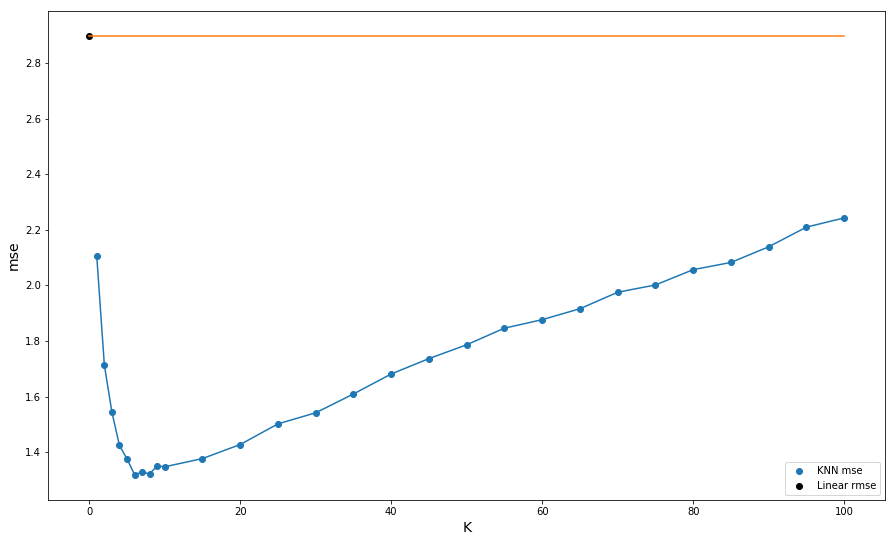

Above is the plot for MSE for linear model in Orange and MSE for K from 1-100 in Blue:


In [16]:
#RMSE
rmse = []
k = []
arr = [0,100]
for kx in range(1,11):
  pred = myknn(x_train,y_train,x_test,kx)
  rmse.append(metrics.mean_squared_error(y_test,pred))
  k.append(kx)

for kx in range(15,101,5):
  pred = myknn(x_train,y_train,x_test,kx)
  rmse.append(metrics.mean_squared_error(y_test,pred))
  k.append(kx)
  
#MSE for Lenear Model to compare the results
lm = linear_model.LinearRegression()
lm.fit(x_train,y_train)
l_p = lm.predict(x_test)
lr_rmse  = metrics.mean_squared_error(y_test,l_p)
print("Linear MSE:")
print ( lr_rmse)

# Plot KNN MSE and Linear MSE

plt.xlabel('K',fontsize=14)
plt.ylabel('mse',fontsize=14)
k_rmse = plt.plot(k,rmse)
l_rmse = plt.plot(arr,[lr_rmse,lr_rmse],linestyle='solid',)
plt.scatter(k,rmse, label="KNN mse")
plt.scatter(0,lr_rmse,color='black',label="Linear rmse")

plt.legend()
plt.show()

print("Above is the plot for MSE for linear model in Orange and MSE for K from 1-100 in Blue:")

**Question 2 [50 Points] Linear Regression through Optimization**


a. [35 Points] Based on this description, write your own R function mylm_g(x, y, delta, epsilon,
maxitr) to implement this optimization version of linear regression. The output of this function
should be a vector of the estimated beta value.

In [0]:
def mylm_g(x, y, delta, epsilon, maxitr):
  beta_curr = np.zeros(x.shape[1])
  n = len(y)
  for r in range(maxitr):
    beta_old = beta_curr
    beta_del = -(1/n)*((y - np.transpose(np.sum(beta_curr*x,1))).dot(x))
    beta_curr = beta_old - (beta_del*delta)
    if(np.amax(beta_curr-beta_old)<epsilon):
      break
  return beta_curr

b. [15 Points] Test this function on the Boston Housing data from the mlbench package. Documentation is provided here if you need a description of the data. We will remove medv, town and tract from
the data and use cmedv as the outcome. We will use a scaled and centered version of the data for estimation. Please also note that in this case, you do not need the intercept term. And you should
compare your result to the lm() function on the same data. Experiment on different maxitr values to obtain a good solution. However your function should not run more than a few seconds.

In [18]:
#Load boston data
df_boston = pd.read_csv('https://maya-jha.github.io/data/BostonData.csv')

#drop columns for x and y as mentioned 
x = np.array(df_boston.drop(['Unnamed: 0','town','medv','tract','cmedv'], axis = 1))
y = np.array(df_boston['cmedv'])

#scale data
x_scaled = preprocessing.scale(x)
y_scaled = preprocessing.scale(y)

#call mylm_g to get the LR
result = mylm_g(x_scaled,y_scaled,0.1,0.00000001,1900)

#call sklearn regression
reg = LinearRegression().fit(x_scaled, y_scaled)

#Print values
print("sklearn weights : ")
print(reg.coef_)
print("mylm_g weights :")
print(result)

#Compare in dataframe
df_res = pd.DataFrame()
df_res['Using mylm_g'] = result
df_res['sklearn'] = reg.coef_
df_res

sklearn weights : 
[-0.03231644  0.03024509 -0.09793597  0.1182731   0.01139038  0.07131225
 -0.19970377  0.28723281  0.00756485 -0.32103934  0.29085076 -0.23652616
 -0.20680497  0.09123541 -0.41797282]
mylm_g weights :
[-0.03231649  0.03024504 -0.09793585  0.11827289  0.01138974  0.07131233
 -0.19970364  0.28723291  0.00756478 -0.32103937  0.29084918 -0.2365244
 -0.20680489  0.0912354  -0.41797276]


,Using mylm_g,sklearn
0,-0.032316,-0.032316
1,0.030245,0.030245
2,-0.097936,-0.097936
3,0.118273,0.118273
4,0.011390,0.011390
5,0.071312,0.071312
6,-0.199704,-0.199704
7,0.287233,0.287233
8,0.007565,0.007565
9,-0.321039,-0.321039
